# Compare semantic graphs from N different models

In [1]:
import sys
PATHS_TO_ADD = [
    "../src"
]
for p in PATHS_TO_ADD:
    if p not in sys.path:
        sys.path.append(p)

In [2]:
from linguistic_analysis.semantics.similarity import SemGraph

import os
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
from typing import Iterable

Embedding models

In [3]:
FULL_MODEL_PATH = "../models/french_novels/balzac/joint/accents_lemmatized/balzac_w2v_sg_w10_mincount5_ep/balzac_w2v_sg_w10_mincount5_ep.model"
PARTIAL_MODELS_DIR = "../models/french_novels/balzac/separate/with_accents_lemmatized"

full_model = KeyedVectors.load(FULL_MODEL_PATH)
#model = KeyedVectors.load(MODEL_PATH)
model_paths = []
models = []

for root, dirs, files in os.walk(PARTIAL_MODELS_DIR):
    for f in files:
        if f.endswith(".model"):
            model_path = os.path.join(root, f)
            print("Loading {}...".format(model_path))
            model_paths.append(model_path)
            models.append(KeyedVectors.load(model_path))


Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Pierre Grassou - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Gobseck - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Contrat de mariage - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Une double famille - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Message - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/La Muse du departement - Honore de Balzac/model_w2v_s

Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Les deux poetes - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/La Peau de chagrin - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Les paysans - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Une tenebreuse affaire - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Modeste Mignon - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Ursule Mirouet - Honore de Balzac/model_w2v

**Key words**

1. Argent
2. Payement = paiement
3. Banque
4. Banquier
5. Crédit
6. Créancier
7. Capital
8. Dépôt
9. Prêt
10. Remboursement
11. Créance
12. Prix
13. Dette
14. Bail
15. Revenus (se pone únicamente en plural)
16. Rente
17. Francs (moneda; plural)
18. Louis d’or (moneda, plural)
19. Écus (moneda, plural)
20. Budget

In [4]:
base_words = [
    "argent",
    "payement", 
    "paiement",
    "banque",
    "banquier",
    "crédit",
    "créancier",
    "capital",
    "dépôt",
    "prêt",
    "remboursement",
    "créance",
    "prix",
    "dette",
    "bail",
    "revenu",
    "rente",
    "franc",
#    "louis d’or",
    "écus",
    "budget"
]

**Build the base semgraph**

- Use this semgraph to select the words to include in every other semgraph. 
- This set of words will be fixed. 
- All the rest of the semgraphs will contain the same words. 
- All links between words will be included in the semgraph.
- Set threshold for links of the semgraph to 0.

In [5]:
N_TOP_SIMILAR = 10
SIMILARITY_THRESHOLD = 0.5

In [6]:
full_sem_graph = SemGraph.build_from_gensim_embedding(full_model, base_words, 
                                                      n_top_similar=N_TOP_SIMILAR,
                                                      similarity_threshold=SIMILARITY_THRESHOLD)


In [7]:
len(full_sem_graph.names)

111

**Calculate relative semantic distances with respect to the base semgraph**

In [8]:
base_sem_graph = SemGraph.build_from_gensim_embedding(full_model, full_sem_graph.names,
                                                      n_top_similar=0,
                                                      similarity_threshold=0)

In [9]:
sem_graphs = []
for m in tqdm(models):
    sem_graphs.append(SemGraph.build_from_gensim_embedding(m, full_sem_graph.names,
                                                 n_top_similar=0,
                                                 similarity_threshold=0))

100%|██████████| 94/94 [00:01<00:00, 50.44it/s]


In [10]:
all_sem_graphs = [base_sem_graph]
for sg in sem_graphs:
    all_sem_graphs.append(sg)

In [11]:
NUM_ITERATIONS = 10
DISCOUNT_FUNCTION = lambda index: 0.9
NORMALIZE = True

sem_distances = SemGraph.get_relative_semantic_distances(base_sem_graph, sem_graphs,
                                                         reset=True,
                                                         num_iterations=NUM_ITERATIONS,
                                                         discount_function=DISCOUNT_FUNCTION,
                                                         normalize=NORMALIZE)

100%|██████████| 94/94 [00:10<00:00,  8.62it/s]


In [12]:
len(sem_distances)

94

In [13]:
min(sem_distances)

108.91698982148223

In [14]:
max(sem_distances)

149.5359800282695

In [15]:
for i in range(len(sem_graphs)):
    print("{}:\t\t{}\n\n".format(model_paths[i], sem_distances[i]))

../models/french_novels/balzac/separate/with_accents_lemmatized/Pierre Grassou - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		149.1458059977509


../models/french_novels/balzac/separate/with_accents_lemmatized/Gobseck - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		145.6850708256218


../models/french_novels/balzac/separate/with_accents_lemmatized/Le Contrat de mariage - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		134.97822171222603


../models/french_novels/balzac/separate/with_accents_lemmatized/Une double famille - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		148.44706014072406


../models/french_novels/balzac/separate/with_accents_lemmatized/Le Message - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		149.5359800282695


../models/french_novels/balzac/separate/with_accents_lemmatized/La M

**Calculate matrix of distances.**

The first semgraph is the base, relative one.

In [16]:
semantic_distance_matrix = SemGraph.get_relative_semantic_distance_matrix(all_sem_graphs,
                                                                          reset=True,
                                                                          num_iterations=NUM_ITERATIONS,
                                                                          discount_function=DISCOUNT_FUNCTION,
                                                                          normalize=NORMALIZE)

100%|██████████| 95/95 [00:12<00:00,  7.65it/s]
95it [00:21,  4.42it/s]


In [18]:
semantic_distance_matrix.shape

(95, 95)

Save to TSV

In [19]:
def get_prefix_overlap(s1: str, s2: str) -> str:
    index_overlap = -1
    for i in range(min(len(s1), len(s2))):
        if s1[i] == s2[i]:
            index_overlap += 1
        else:
            break
    if index_overlap == -1:
        return ""
    return s1[:index_overlap+1]

def get_suffix_overlap(s1: str, s2: str) -> str:
    index_overlap = -1
    for i in range(1,min(len(s1), len(s2))+1):
        if s1[-1*i] == s2[-1*i]:
            index_overlap += 1
        else:
            break
    if index_overlap == -1:
        return ""
    return s1[-1*index_overlap-1:]



In [20]:
#get_suffix_overlap("123456789", "11189")

In [21]:
def extract_label(paths: Iterable[str]) -> str:
    # Infer common prefix
    prefix = None
    for p in paths:
        if prefix is None:
            prefix = p
        else:
            prefix = get_prefix_overlap(prefix, p)
    # Infer common suffix
    suffix = None
    for p in paths:
        if suffix is None:
            suffix = p
        else:
            suffix = get_suffix_overlap(suffix, p)
    # Remove common prefix and suffix
    print("prefix: {}".format(prefix))
    print("suffix: {}".format(suffix))
    res = [p[len(prefix):][:-1*len(suffix)].strip() for p in paths]
    return res

In [22]:
labels = extract_label(model_paths)

prefix: ../models/french_novels/balzac/separate/with_accents_lemmatized/
suffix:  - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model


In [23]:
for i in range(len(model_paths)):
    print("{} -> {}".format(model_paths[i], labels[i]))

../models/french_novels/balzac/separate/with_accents_lemmatized/Pierre Grassou - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model -> Pierre Grassou
../models/french_novels/balzac/separate/with_accents_lemmatized/Gobseck - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model -> Gobseck
../models/french_novels/balzac/separate/with_accents_lemmatized/Le Contrat de mariage - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model -> Le Contrat de mariage
../models/french_novels/balzac/separate/with_accents_lemmatized/Une double famille - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model -> Une double famille
../models/french_novels/balzac/separate/with_accents_lemmatized/Le Message - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model -> Le Message
../models/french_novels/balzac/separate/with_accents_lemmatized/La Muse du departement - H

In [24]:
all_labels = ["FULL_SEMGRAPH"]
all_labels += [l for l in labels]
SemGraph.save_stacked_semgraphs_to_tsv(all_sem_graphs, all_labels, "stacked.tsv")

100%|██████████| 95/95 [00:00<00:00, 484743.16it/s]


In [25]:
labels

['Pierre Grassou',
 'Gobseck',
 'Le Contrat de mariage',
 'Une double famille',
 'Le Message',
 'La Muse du departement',
 'Les Marana',
 'Albert Savarus',
 'La derniere incarnation de Vautrin',
 'Autre etude de femme',
 "Esquisse d'homme d'affaires d'apres nature",
 'La Vieille Fille',
 'Un drame au bord de la mer',
 'Le Colonel Chabert',
 'Illusions perdues',
 'La grande Breteche',
 'Etude de femme',
 'Pierrette',
 'Ferragus',
 'Beatrix',
 'Jesus-Christ en Flandre',
 'La Duchesse de Langeais',
 'Ou menent les mauvais chemins',
 'La Femme abandonnee',
 'Sur Catherine de Medicis',
 "La Recherche de l'Absolu",
 "Une fille d'Eve",
 'Le Lys dans la vallee',
 'Louis Lambert',
 'Eugenie Grandet',
 'Le Bal de Sceaux',
 'Petites miseres de la vie conjugale',
 "L'auberge rouge",
 'Seraphita',
 'Un menage de garcon',
 'Les Chouans',
 'Un grand homme de province a Paris',
 'La Maison Nucingen',
 'Histoire de la grandeur et de la decadence',
 'Un prince de la Boheme',
 'Un debut dans la vie',
 'S

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#sns.set_theme(style="whitegrid")

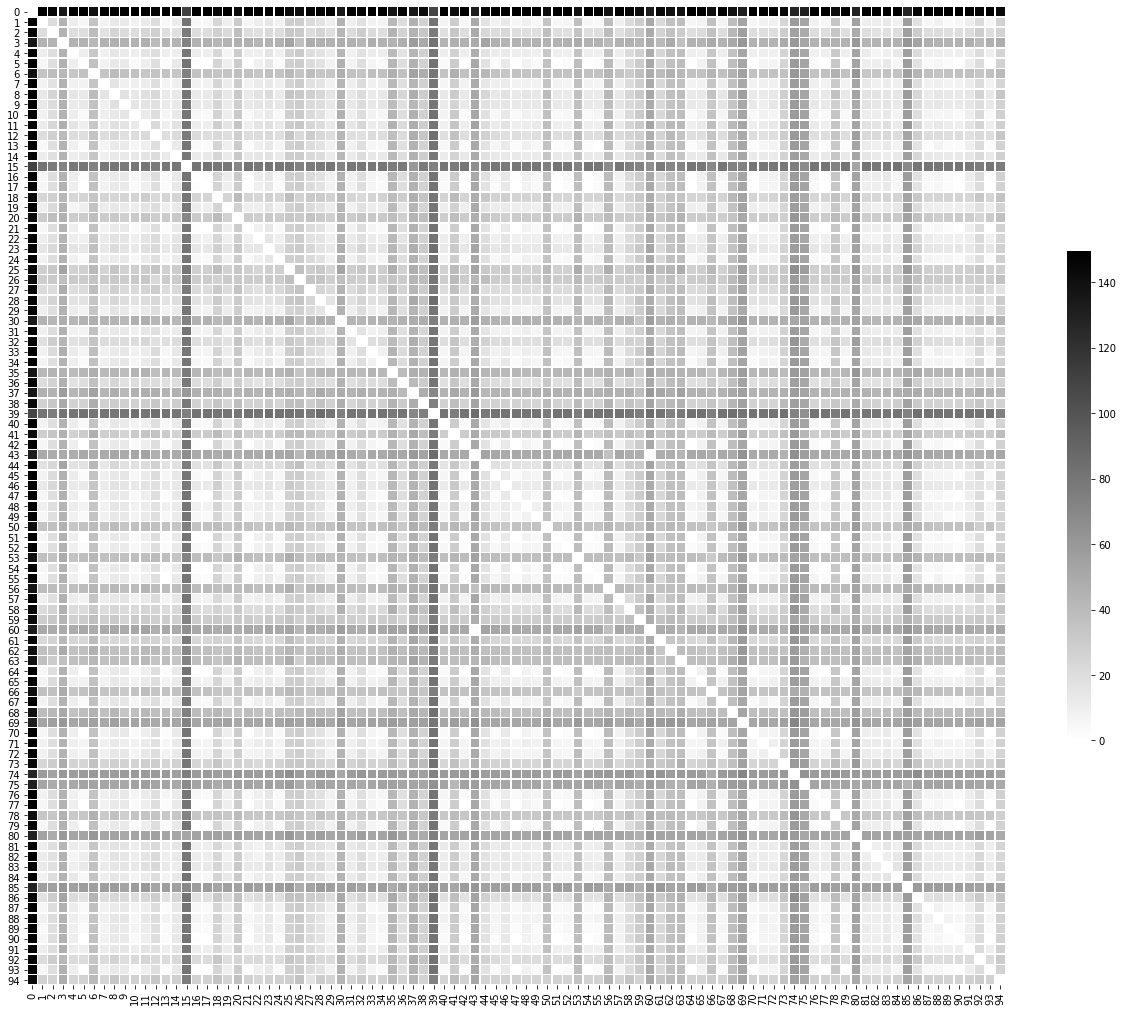

In [81]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap="coolwarm"
cmap="cool"
cmap="gray_r"


#g = sns.heatmap(semantic_distance_matrix, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
g = sns.heatmap(semantic_distance_matrix, 
                cmap=cmap, 
                square=True, 
                linewidths=.5, 
                cbar_kws={"shrink": .5}
               )

In [82]:
condensed_semantic_distance_vector = []
for i in range(1, semantic_distance_matrix.shape[0]):
    for j in range(i+1, semantic_distance_matrix.shape[0]):
        condensed_semantic_distance_vector.append(semantic_distance_matrix[i,j])

In [83]:
semantic_distance_matrix[0,:]

array([  0.        , 149.145806  , 145.68507083, 134.97822171,
       148.44706014, 149.53598003, 140.02252519, 148.74880956,
       147.89923349, 147.64050255, 149.3292692 , 148.18946836,
       145.89948686, 149.40708872, 147.83003396, 111.25252038,
       149.48488322, 149.53598003, 144.14104114, 148.49735187,
       142.44414081, 149.53598003, 148.64082976, 147.48406448,
       149.31233899, 143.91549475, 141.9025085 , 145.83371839,
       146.82027165, 148.74993531, 134.86236662, 148.77611311,
       146.2463608 , 149.02532439, 149.30715859, 137.22339213,
       146.3529309 , 135.63761915, 143.5030248 , 108.91698982,
       149.24676167, 142.23563661, 149.53598003, 132.35591884,
       146.83634277, 149.39277749, 147.73729658, 149.53598003,
       148.7829961 , 149.27268445, 140.8270726 , 149.53598003,
       149.41275336, 139.31832079, 149.53598003, 149.41142226,
       138.29644614, 148.79334855, 145.55897197, 142.42547153,
       132.31022481, 144.63845763, 139.55872355, 138.44

In [85]:
#semantic_distance_matrix[1,:]

In [86]:
#max(condensed_semantic_distance_vector)

**Hierarchical clustering**

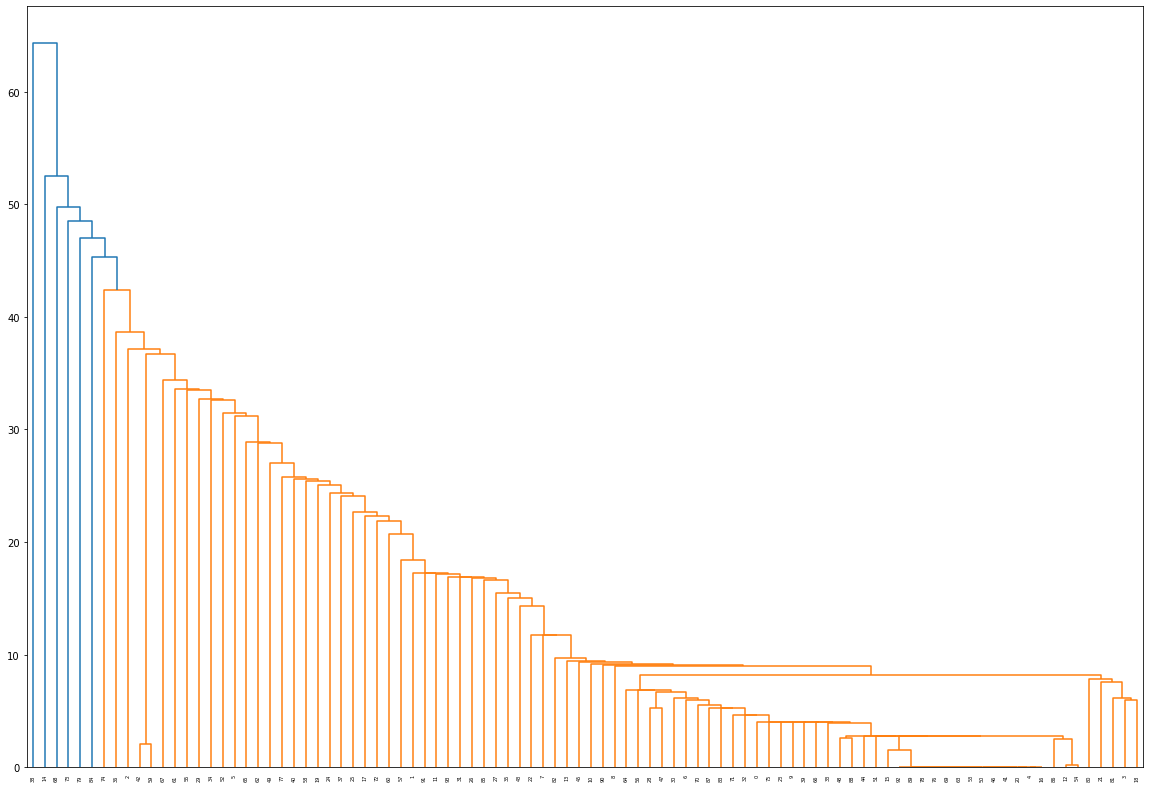

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(condensed_semantic_distance_vector, 'single', optimal_ordering=False)

#labelList = range(1, 11)

plt.figure(figsize=(20, 14))
dendrogram(linked,
            orientation='top',
#            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [27]:
?linkage